In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

import os

while ".gitignore" not in os.listdir():
    parent = os.path.dirname(os.getcwd())
    os.chdir(parent)
print(f"Working directory: {os.getcwd()}")
import wandb
import torch


from spatialnca.train import train

from spatialnca.config import Config

Working directory: /home/dschaub/projects/spatialnca


In [4]:
default_cfg = Config()
cfg = Config()
# cfg.emb_key = None
# cfg.add_init = True
# cfg.act = "gelu"
# cfg.gpt2_weight_init = True
# cfg.pos_init_fn = "uniform"
# cfg.pos_init_fn = "sunflower"
# cfg.knn = 20
cfg.dynamic_edges = True
cfg.n_static_warmup_steps = 1000
cfg.edge_update_steps = 1
cfg.use_orig_graph = False  # use the initial graph for the first n_static_warmup_steps
cfg.clip_value = 0.5
cfg.lr = 1e-3
cfg.warmup_iters = 500
# cfg.n_epochs = int(1e6)
cfg.n_epochs = 1000
# cfg.intm_loss = True
# cfg.normalize_diff = True
# cfg.max_coord_upd_norm = 0.75
# cfg.complete = True
# cfg.delaunay = True
# cfg.knn = None
# cfg.pos_init_fn = "random_walk"
# cfg.pos_init_kwargs = {"scale": 0.1}
cfg.n_steps = 5
# cfg.kernel_fn = "gaussian"
# cfg.kernel_kwargs = {"sigma": 0.0}
# cfg.use_attn = True
# cfg.aggr = "mean"

diff = cfg - default_cfg
if len(diff) > 0:
    diff_str = ",\n".join([f"{k}={v}" for k, v in diff.items()])
else:
    diff_str = "Default config"
clean_diff_str = diff_str.replace(", ", "_").replace("\n", "_")
print(diff_str)

n_epochs=10000->1000,
warmup_iters=0->500,
clip_value=1.0->0.5,
dynamic_edges=False->True,
n_static_warmup_steps=0->1000,
use_orig_graph=True->False


Constructed graph with 318 nodes and 3180 edges


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

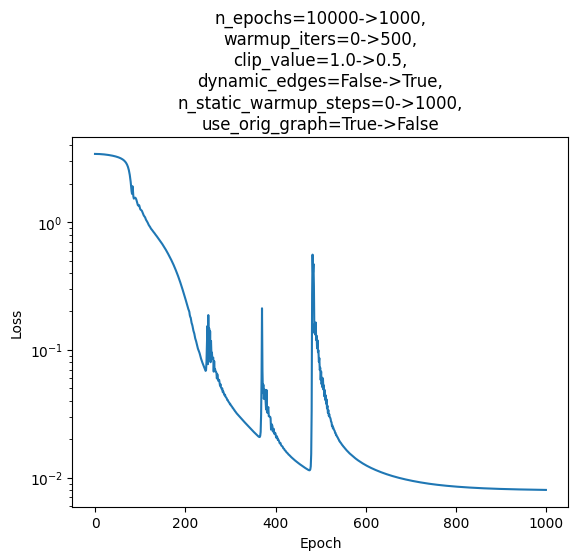

In [5]:
wandb.finish()
os.environ["WANDB_MODE"] = "disabled"
# os.environ["WANDB_MODE"] = "online"
# os.environ["WANDB_DISABLED"] = "true"

trainer = train(cfg, print_cfg=False)
trainer.plot_history(title=diff_str, save_path=f"figures/history_{clean_diff_str}.png")

torch.save(trainer.model, f"checkpoints/trained_model_{clean_diff_str}.pt")